## **Aim: Predict the percentage of an student based on the no. of study hours Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

##  **Author: Chirag Bansal**
#### **_University of Petroleum and Energy Studies_**

In [1]:
#Importing all necessary libraries required.
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data from remote link
link = "http://bit.ly/w-data"
file = pd.read_csv(link)
print("Data imported successfully")
file

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#check the shape of the data
file.shape

(25, 2)

In [4]:
file.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
file.dropna

<bound method DataFrame.dropna of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [6]:
file.drop_duplicates

<bound method DataFrame.drop_duplicates of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [7]:
file.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
file.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
file.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Let's plot our data points on 2-D graph(Scattered graph) to see our dataset and see if we can manually find any relationship between the Hours and Scores**.
## *We can create the plot with the following script:*

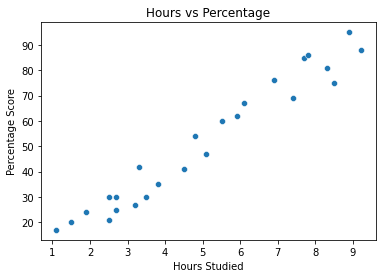

In [11]:
# Plotting the distribution of scores
ax=sns.scatterplot(x=file['Hours'], y=file['Scores'])  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [12]:
#checking the names of the columns
file.columns

Index(['Hours', 'Scores'], dtype='object')

<AxesSubplot:>

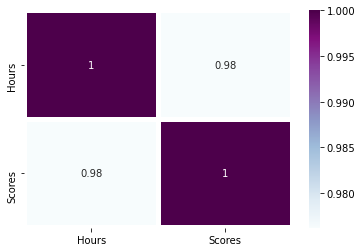

In [13]:
sns.heatmap(file.corr(),annot=True,linewidths=4,cmap='BuPu')

# Now the code for Machine Learning Starts

In [14]:
#slicing the values
X = file.iloc[:, :-1].values #First Column which is hours : features  
y = file.iloc[:, 1].values  #Second Column which is scores : labels

## Importing the Libraries for Machine Learning

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:
# Splitting the data and training and evaluating it
x_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0) 

In [18]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

print('Training Completed')

Training Completed


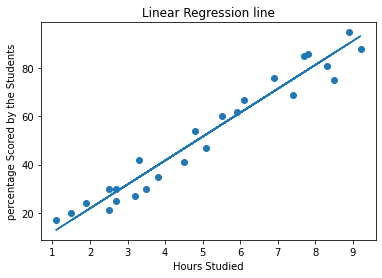

In [19]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title('Linear Regression line')
plt.xlabel('Hours Studied')
plt.ylabel('percentage Scored by the Students')
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predicting the values from the Model

In [20]:
y_pred = regressor.predict(X_test) # Predicting the scores
print(X_test)#predicting the value in hours
print(y_pred) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Predcting the Score value for 9.25 Hours per day

In [22]:
# Checking the output by putting random hours of our choice
n=float(input('Enter number of hours:'))
calc = regressor.predict([[n]])
print("No of Hours = {n}")
print("Predicted Score = {}".format(calc[0]))

Enter number of hours:9.25
No of Hours = {n}
Predicted Score = 93.89272889341655


# Calculating Accuracy and Errors

In [23]:
print('Mean Absolute Error:{}'.format(mean_absolute_error(y_test,y_pred)))
print('Mean Squared Error:{}'.format(mean_squared_error(y_test,y_pred)))
print('Root Mean squared Error:{}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('R2 Score is:{}'.format(r2_score(y_test,y_pred)))

Mean Absolute Error:4.130879918502486
Mean Squared Error:20.33292367497997
Root Mean squared Error:4.5092043283688055
R2 Score is:0.9367661043365055


# *Thank You*